# Aufgabe 2: Multi-Class Perceptrons

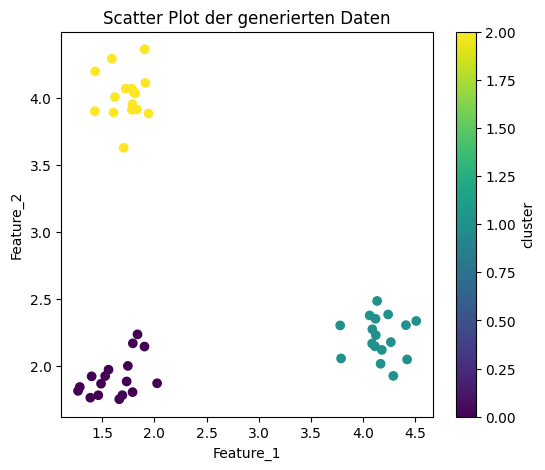

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# makeblobs
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.2,
                  n_features=2, center_box=(1,5), random_state=104)

# plot
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Scatter Plot der generierten Daten")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.colorbar(label="cluster")
plt.show()


### draw Percepton layout
* Hint: now we have more then one Perceptron
* write math. formulation as linear model

In [15]:
# Für jedes perceptron gilt folgende grundformel:

#  Formel: f(x)=Wx+b
#  W = Gewcihtsmatrix, welche alle Gewichtsvektoren wk enthält
#  x = Eingabevektor, hier |x1, x2| für 2D
#  b = Bias vektor, der alle bias terme bk enthält

### Transform lables to one-hot coding
* Hint: Use Scikit-Learn

In [16]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# one-hot:
encoder = OneHotEncoder()
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
print("oh-kodierte Labels:\n", y_onehot)


oh-kodierte Labels:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50 stored elements and shape (50, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
  (8, 2)	1.0
  (9, 2)	1.0
  (10, 0)	1.0
  (11, 2)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 2)	1.0
  (21, 1)	1.0
  (22, 2)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  (25, 1)	1.0
  (26, 0)	1.0
  (27, 1)	1.0
  (28, 2)	1.0
  (29, 1)	1.0
  (30, 2)	1.0
  (31, 0)	1.0
  (32, 0)	1.0
  (33, 1)	1.0
  (34, 2)	1.0
  (35, 2)	1.0
  (36, 2)	1.0
  (37, 0)	1.0
  (38, 2)	1.0
  (39, 0)	1.0
  (40, 0)	1.0
  (41, 2)	1.0
  (42, 0)	1.0
  (43, 2)	1.0
  (44, 1)	1.0
  (45, 0)	1.0
  (46, 0)	1.0
  (47, 1)	1.0
  (48, 0)	1.0
  (49, 1)	1.0


### Manually find parameters $w$ and $b$ for
* for each Perceptron seperately
* then combine to single matrix multiplication formulation

In [17]:
# Berechnung der Zentren (Mittelwerte/mean der einzelnen cluster)
centroids = []
for label in np.unique(y):
    centroids.append(X[y == label].mean(axis=0))
centroids = np.array(centroids)
print("Clusterzentren:\n", centroids)


# Gesamtmittelpunkt od. Schwerpunkt:
overall_mean = X.mean(axis=0)

W = []
b = []
for i, centroid in enumerate(centroids):
    w_k = 2 * (centroid - overall_mean)   # weight d. k-ten Perzeptrons
    b_k = 1 - np.dot(w_k, centroid)         # bias
    W.append(w_k)
    b.append(b_k)

W = np.array(W)
b = np.array(b)

print("gewichtsmatrix W:\n", W)
print("bias-Vektor b:\n", b)



Clusterzentren:
 [[1.62160392 1.91542389]
 [4.16438788 2.2196226 ]
 [1.73046371 4.0192162 ]]
gewichtsmatrix W:
 [[-1.79876336 -1.5532822 ]
 [ 3.28680456 -0.94488478]
 [-1.58104377  2.65430242]]
bias-Vektor b:
 [  6.89207555 -10.59024144  -6.93227641]


#### test single perceptrons by class


In [18]:
# Testen d. perceptron-activation
activations = []
for i in range(len(X)):
    # lineare Aktivierung für jedes perceptron
    act = [np.dot(W[k], X[i]) + b[k] for k in range(3)]
    activations.append(act)

activations = np.array(activations)
print("Aktivierungen :\n", activations)


Aktivierungen :
 [[ 1.01939943e+00 -7.32723237e+00 -4.15950516e+00]
 [-4.11241095e+00  5.18063384e-01 -7.04258338e+00]
 [-1.81586401e+00 -8.41243346e+00  5.98838961e-03]
 [-3.12089046e+00 -7.89741858e-02 -7.46172149e+00]
 [-2.53568457e+00 -8.76617278e+00  1.14664576e+00]
 [-2.25236465e+00 -9.04592123e+00  1.14285108e+00]
 [-4.62553132e+00  1.72995795e+00 -7.78503097e+00]
 [ 1.10325235e-01 -6.66293190e+00 -3.89943309e+00]
 [-2.04794224e+00 -8.98380826e+00  8.59657233e-01]
 [-2.39734533e+00 -8.42224771e+00  6.34239927e-01]
 [ 1.49183567e+00 -7.46882654e+00 -4.51102487e+00]
 [-2.48831918e+00 -8.26322854e+00  5.61941788e-01]
 [ 1.31320253e-01 -6.35740044e+00 -4.24636747e+00]
 [-4.16892813e+00  1.37487696e+00 -7.89289830e+00]
 [-3.99880380e+00  6.99737597e-01 -7.35631983e+00]
 [ 8.43199605e-01 -6.67274657e+00 -4.66768402e+00]
 [ 1.78982522e+00 -8.13712840e+00 -4.11756805e+00]
 [-3.98954807e+00  8.50983429e-01 -7.52685274e+00]
 [-4.40877753e+00  6.51457594e-01 -6.86942524e+00]
 [ 1.07682869e

#### test full Setup

## Add non-linear activation / loss -> $softmax$
* implement a $softmax$ function
* replace $sgn$ by $softmax$
* plot confidence of the test samples

In [19]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)


In [20]:
# linearen Ausgaben für alle Samples
Z = np.dot(X, W.T) + b  # Z

# Softmax-Funktion zeilenweise
softmax_outputs = np.apply_along_axis(softmax, 1, Z)
print("Softmax:\n", softmax_outputs)


Softmax:
 [[9.94162903e-01 2.35809567e-04 5.60128755e-03]
 [9.65101082e-03 9.89833743e-01 5.15246542e-04]
 [1.39185299e-01 1.89993899e-04 8.60624707e-01]
 [4.55407262e-02 9.53866074e-01 5.93199791e-04]
 [2.45453831e-02 4.83173565e-05 9.75406300e-01]
 [3.24441400e-02 3.63690644e-05 9.67519491e-01]
 [1.73404482e-03 9.98192350e-01 7.36049555e-05]
 [9.81083012e-01 1.12232221e-03 1.77946661e-02]
 [5.17765634e-02 5.03413529e-05 9.48173095e-01]
 [4.60140624e-02 1.11252228e-04 9.53874685e-01]
 [9.97406710e-01 1.28028346e-04 2.46526198e-03]
 [4.51998646e-02 1.40322032e-04 9.54659813e-01]
 [9.86120505e-01 1.49938926e-03 1.23801062e-02]
 [3.89600690e-03 9.96009951e-01 9.40416034e-05]
 [9.02350014e-03 9.90662287e-01 3.14213141e-04]
 [9.95434075e-01 5.41849343e-04 4.02407583e-03]
 [9.97239535e-01 4.87055338e-05 2.71175960e-03]
 [7.83909907e-03 9.91932849e-01 2.28052194e-04]
 [6.30068298e-03 9.93161367e-01 5.37949989e-04]
 [9.96993420e-01 4.13414255e-04 2.59316527e-03]
 [2.42310321e-02 6.38482957e-0

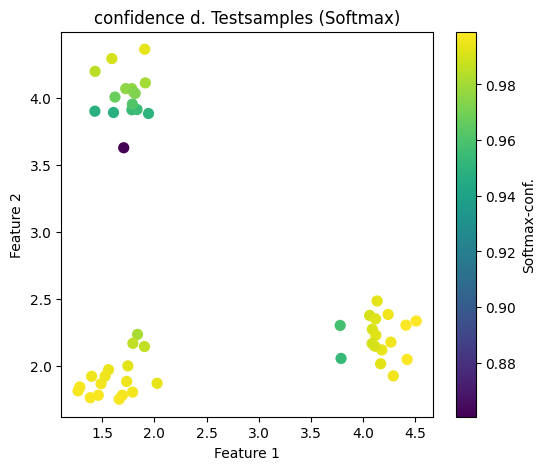

In [21]:
# prediction
predicted_class = np.argmax(softmax_outputs, axis=1)
confidence = np.max(softmax_outputs, axis=1)

# Plot d. confidence
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=confidence, cmap='viridis', s=50)
plt.title("confidence d. Testsamples (Softmax)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Softmax-conf.")
plt.show()
